# GNG5902 Waste Advisor Project - Deliverable 1
### This deliverable is meant to present an initial end to end solution to the image to bin waste classification problem.

This notebook can also be found and run on [Kaggle](https://www.kaggle.com/viralpatel07/waste-classification-deliverable-1?scriptVersionId=45851518)

A number of ML models were trained and tested for this purpose. There details of the dataset and other models (not shown here) can be found in the accompanying ppt.


# 1. Model Training

* We have used Google's Teachable Machine to train a Classification Model.

* Model Built on: https://teachablemachine.withgoogle.com/

# 2. Model Prediction
* Load a saved model

In [1]:
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np
import urllib.request as ur

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
url = 'https://github.com/Karamvir-Singh/wasteAI/blob/main/keras_model.h5?raw=true'
file_name = 'model.h5'
ur.urlretrieve(url, file_name)
model = tensorflow.keras.models.load_model(file_name)

print("Model Loaded")

Model Loaded


* Input: Image file
* Output: A string 
        0 green_bin
        1 Blue_bin
        2 black_bin
        3 trash_bin

* Downloading and image from the internet and running the model on it to output prediction.

Blue_bin


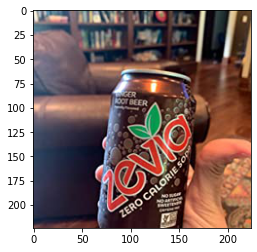

In [2]:
from matplotlib.pyplot import imshow

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
# downloading a random image of metalc can from google
ur.urlretrieve('https://images-na.ssl-images-amazon.com/images/I/71gMdQgOK4L._CR0,204,1224,1224_UX256.jpg', 'test_image.jpg')

image = Image.open('test_image.jpg')

#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)

# display the resized image
%matplotlib inline
imshow(image_array)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
data[0] = normalized_image_array

# run the inference
result = model.predict(data)
result=np.argmax(result)
   
# process an array and print result
if result == 0:
    prediction = "Green_bin"
elif result == 1:
    prediction = "Blue_bin"
elif result == 2:
    prediction = "Black_bin"
elif result == 3:
    prediction = "Trash_bin"
else:
    prediction = "error"

print(prediction)


# 3. API creation and Cloud Deployment

The model is currently deployed in a docker container hosted on the 'f1-micro' compute instance that is included in the free-tier of Google Cloud Platform.
The API is built using Starlette and served as a small web-app at:

[WasteAPI](http://34.123.100.48/)

The project files for the same can be found in this [Github Repo](https://github.com/Karamvir-Singh/wasteAPI)

##### The following code sends a request to the API and prints the response.

* Preparing data for request

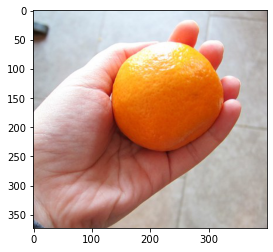

In [3]:
import requests
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# setting up data to send request to the api
upload_url = 'http://34.123.100.48/upload/'

# # open and resize the image file, change the path to the image here.
# image = Image.open('test_image.jpg')

# # convert image to bytes Array
# imgByteArr = io.BytesIO()
# image.save(imgByteArr, format="jpeg")
# imgByteArr = imgByteArr.getvalue()

# change image url here
filename = 'test_image,jpg'
imgurl = 'https://i2.wp.com/www.melaniecooks.com/wp-content/uploads/2011/03/blood-tangerine2.jpg'

#download and display the image
ur.urlretrieve(imgurl, filename)
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

# packing in the requiredformat
img_file = {"file": ("test.jpeg", open(filename, 'rb'), "image/jpeg")}

* Sending the request and printing response.

In [4]:
# calling the api
response = requests.post(upload_url, files = img_file)

# getting the name of the bin from response
prediction = response.json()['Prediction'].replace('_', ' ')

# printing the results
print('The item in the image should go into the ' + prediction + '.\n')
print('The response was recieved in ' + str(response.elapsed.total_seconds()) + "s.")

The item in the image should go into the Green bin.

The response was recieved in 0.963318s.


In [5]:
# printing complete response
print("Here is the complete json response:\n")
print(response.json())

Here is the complete json response:

{'Prediction': 'Green_bin'}
